# Object recognition drills

You've seen an example of a simple neural network in the [previous](./3.object_recognition_with_keras.ipynb) [chapters](./4.object_recognition_with_pytorch.ipynb), but can you make your own as well? Let's flex our neural skills and **extend** the model from the previous chapter.

## Multiple classes

The previous model was alright in separating cats from dogs, but what if we want to add on more classes? Extend the previous model by **adding more classes** from the Google ["quick,draw!" dataset](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap). 

Choose 6 classes of your own, train and test your model as shown in the previous notebook. You might need to change the model structure a bit to deal with the new classes. Hint: choose yourself some visually distinct classes to make your life a bit easier.

You can choose whether you want to use keras or pytorch.

In [1]:
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy -P ../assets/

--2021-03-11 14:30:18--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.179.208, 172.217.19.208, 216.58.208.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.179.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98965184 (94M) [application/octet-stream]
Saving to: ‘../assets/anvil.npy’

anvil.npy           100%[===================>]  94.38M  10.1MB/s    in 9.8s    

2021-03-11 14:30:28 (9.62 MB/s) - ‘../assets/anvil.npy’ saved [98965184/98965184]

--2021-03-11 14:30:28--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.179.144, 216.58.208.112, 172.217.19.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.179.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [applic

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

Text(0, 0.5, 'number of samples')

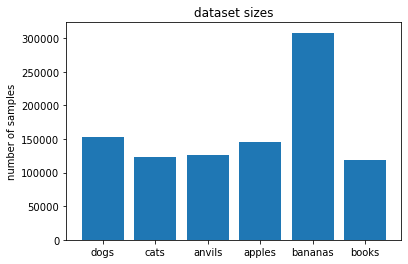

In [5]:
dogs = np.load("../assets/dog.npy")
cats = np.load("../assets/cat.npy")
anvils = np.load("../assets/anvil.npy")
apples = np.load("../assets/apple.npy")
bananas = np.load("../assets/banana.npy")
books = np.load("../assets/book.npy")

plt.bar(range(6), [dogs.shape[0], cats.shape[0], anvils.shape[0], apples.shape[0], bananas.shape[0], books.shape[0]])
plt.title('dataset sizes')
plt.xticks(range(6), ['dogs', 'cats', "anvils", "apples", "bananas", "books"])
plt.ylabel('number of samples')

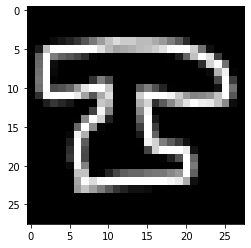

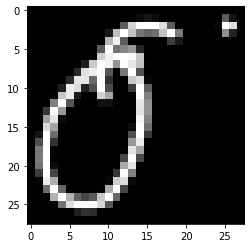

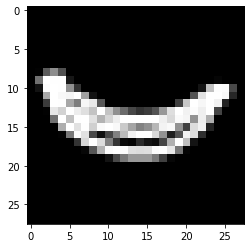

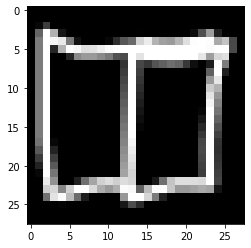

In [6]:
sample = anvils[0].reshape(28,28)
plt.imshow(sample, cmap="gray")
plt.show()
sample = apples[0].reshape(28,28)
plt.imshow(sample, cmap="gray")
plt.show()
sample = bananas[0].reshape(28,28)
plt.imshow(sample, cmap="gray")
plt.show()
sample = books[0].reshape(28,28)
plt.imshow(sample, cmap="gray")
plt.show()

In [7]:
max_samples = min(cats.shape[0], dogs.shape[0], anvils.shape[0], apples.shape[0], bananas.shape[0], books.shape[0])
preprocessed_cats = cats[:max_samples].reshape(-1,28,28)
preprocessed_dogs = dogs[:max_samples].reshape(-1,28,28)
preprocessed_anvils = anvils[:max_samples].reshape(-1,28,28)
preprocessed_apples = apples[:max_samples].reshape(-1,28,28)
preprocessed_bananas = bananas[:max_samples].reshape(-1,28,28)
preprocessed_books = books[:max_samples].reshape(-1,28,28)

print(max_samples)

119364


In [16]:
cats_labels = np.zeros((max_samples, 1))
dogs_labels = np.ones((max_samples, 1))
anvils_labels = np.full((max_samples, 1), 2)
apples_labels = np.full((max_samples, 1), 3)
bananas_labels = np.full((max_samples, 1), 4)
books_labels = np.full((max_samples, 1), 5)

labels = np.concatenate([cats_labels, dogs_labels, anvils_labels, apples_labels, bananas_labels, books_labels])
labels = to_categorical(labels)

drawings = np.concatenate([preprocessed_cats, preprocessed_dogs, preprocessed_anvils, preprocessed_apples, preprocessed_bananas, preprocessed_books])
drawings = np.expand_dims(drawings, axis=3)

print(labels.shape)
print(drawings.shape)

(716184, 6)
(716184, 28, 28, 1)


In [17]:
from sklearn.model_selection import train_test_split

train_drawings, test_drawings, train_labels, test_labels = train_test_split(
    drawings, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

print("train_drawings shape : ", train_drawings.shape)
print("test_drawings shape : ", test_drawings.shape)
print("train_labels shape : ", train_labels.shape)
print("test_labels shape : ", test_labels.shape)

train_drawings shape :  (572947, 28, 28, 1)
test_drawings shape :  (143237, 28, 28, 1)
train_labels shape :  (572947, 6)
test_labels shape :  (143237, 6)


In [21]:
# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 32

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(6, activation='softmax'))
model.summary()

ValueError: Negative dimension size caused by subtracting 5 from 4 for '{{node conv2d_13/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_13/Conv2D/ReadVariableOp)' with input shapes: [?,4,4,32], [5,5,32,32].

In [24]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_drawings, train_labels, epochs=2, 
                    validation_data=(test_drawings, test_labels))

Epoch 1/2
17905/17905 [==============================] - 615s 34ms/step - loss: 1.8815 - accuracy: 0.1662 - val_loss: 1.7919 - val_accuracy: 0.1658
Epoch 2/2
17905/17905 [==============================] - 621s 35ms/step - loss: 1.7919 - accuracy: 0.1670 - val_loss: 1.7918 - val_accuracy: 0.1667


4477/4477 - 28s - loss: 1.7918 - accuracy: 0.1667


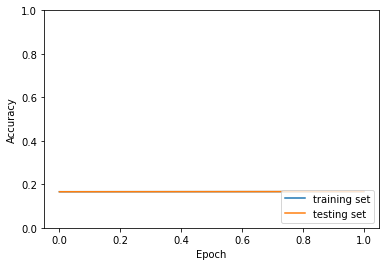

In [26]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_drawings,  test_labels, verbose=2)

## Full-color dataset

Drawings are nice, but how good are CNN's for nice color pictures? Download [this](https://www.kaggle.com/moltean/fruits) dataset to get pictures of fruits and vegetables. Design and evaluate a CNN to classify these (remember; these are RGB color pictures).

Hint: take some inspiration from already successful and [popular CNN architectures](https://www.topbots.com/important-cnn-architectures/), from [keras built-in NN models](https://keras.io/api/applications/) or [pytorch built-in ones](https://pytorch.org/vision/0.8/models.html).

PS: You can create a separate repository for this project.

In [ ]:
# Design and evaluate a CNN for classifying fruits and vegetables

## Visualizing feature extraction

Alright, time for some nice visualizations! Neural networks are notoriously **hard to interpret**, and all their hidden variables make for a very **unobservable** transformation. How can we, as humans, still visualize our neural network, though?

We can visualize the feature maps, which is what each convolutional layer 'sees' after the filters are applied. Follow the steps described in [this article](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/) to try this out on your fruit CNN!

PS: You can have this in the same repo as your Fruit CNN

In [ ]:
# Visualize the feature maps of your fruit CNN